In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input/cryptocurrency/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input/cryptocurrency/coin_Bitcoin.csv
./input/cryptocurrency/coin_Ethereum.csv


In [151]:
df = None
for dirname, _, filenames in os.walk('./input/cryptocurrency/'):
    for filename in filenames:
        
        if filename not in ["coin_Bitcoin.csv", "coin_Ethereum.csv",]: # isolating bitcoin only makes it more accurate 
            continue
    
        raw = pd.read_csv(os.path.join(dirname, filename))
        
        try:
            df = pd.concat([df, pd.DataFrame.from_records(raw)])
        except:
            df = raw
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [152]:
df['Date'] = pd.to_datetime(df['Date'])
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [153]:
# clean the data, drop the nonsensical headers
df["Increase"] = df["Close"] > df["Open"]
df["Increase"] = df["Increase"].astype(int)
print(df["Increase"])

df["Change"] =  ( df["Close"] - df["Open"] ) / df["Open"]
print(df)

0       1
1       0
2       0
3       0
4       0
       ..
2155    1
2156    1
2157    1
2158    0
2159    1
Name: Increase, Length: 5151, dtype: int32
       SNo      Name Symbol                Date         High          Low  \
0        1   Bitcoin    BTC 2013-04-29 23:59:59   147.488007   134.000000   
1        2   Bitcoin    BTC 2013-04-30 23:59:59   146.929993   134.050003   
2        3   Bitcoin    BTC 2013-05-01 23:59:59   139.889999   107.720001   
3        4   Bitcoin    BTC 2013-05-02 23:59:59   125.599998    92.281898   
4        5   Bitcoin    BTC 2013-05-03 23:59:59   108.127998    79.099998   
...    ...       ...    ...                 ...          ...          ...   
2155  2156  Ethereum    ETH 2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH 2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH 2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH 2021-07-05 23:59:59  2321.922836  2163.041394   


In [154]:
train_data = df.drop(labels=["SNo", "Name", "Symbol", "Date"], axis=1)
train_data

,High,Low,Open,Close,Volume,Marketcap,Increase,Change
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1,0.075094
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,0,-0.034722
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,0,-0.158345
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,0,-0.095979
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,0,-0.080000
...,...,...,...,...,...,...,...,...
2155,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,1,0.019028
2156,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,1,0.035000
2157,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,1,0.042745
2158,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,0,-0.053120


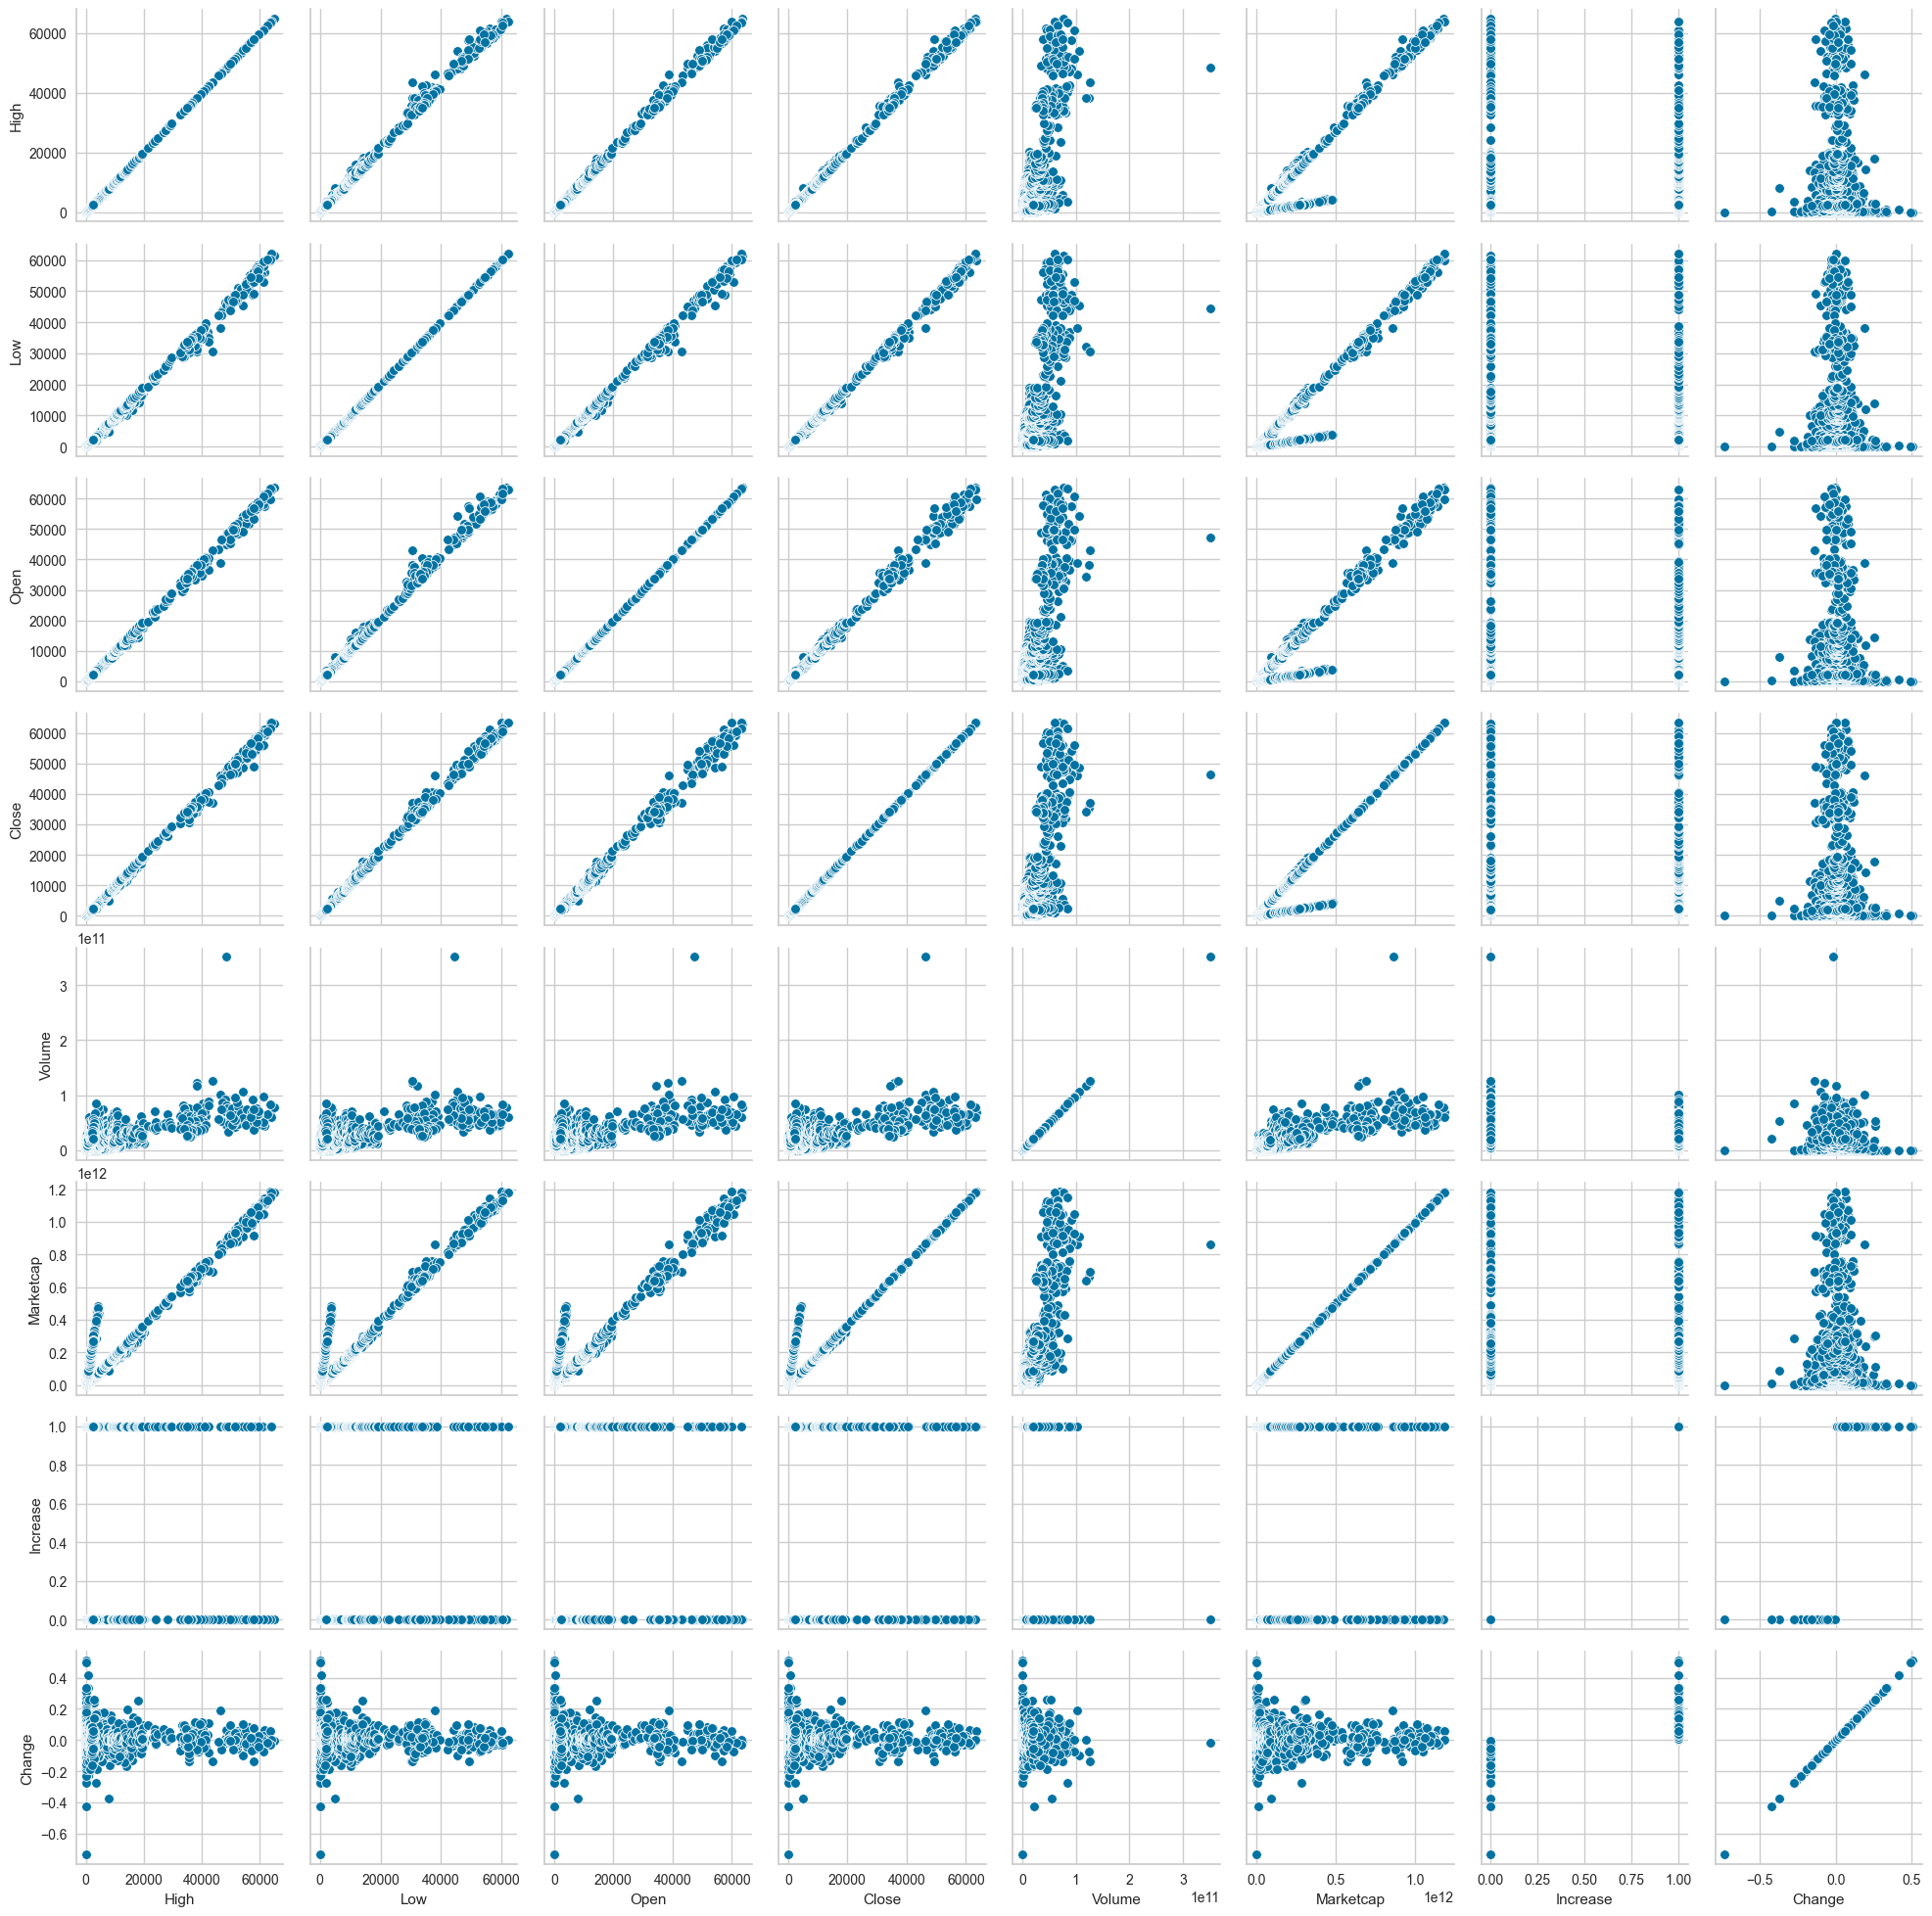

In [155]:
import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)

(array([3.53430578e+02, 1.53286476e+03, 2.58747168e+03, 8.51010592e+03,
       5.70868354e+09, 3.04166426e+11, 7.21629008e-01]), array([7.58739907e-79, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.95610084e-01]))


<AxesSubplot:>

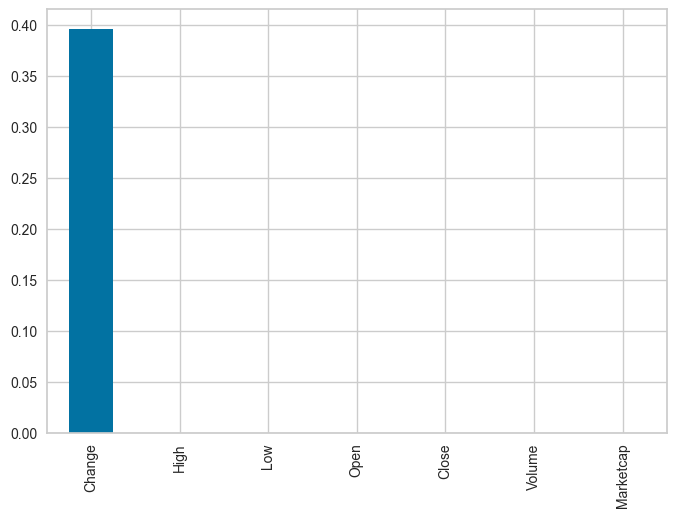

In [156]:
# here use chi2 if features were acceptable
from sklearn.feature_selection import chi2

_train_labels = train_data["Increase"]
_train_data = train_data.drop(labels=["Increase"], axis=1)
_train_data["Change"] = abs(_train_data["Change"]) # 


chi_scores = chi2(_train_data, _train_labels)
print(chi_scores)
p_values = pd.Series(chi_scores[1], index=_train_data.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()


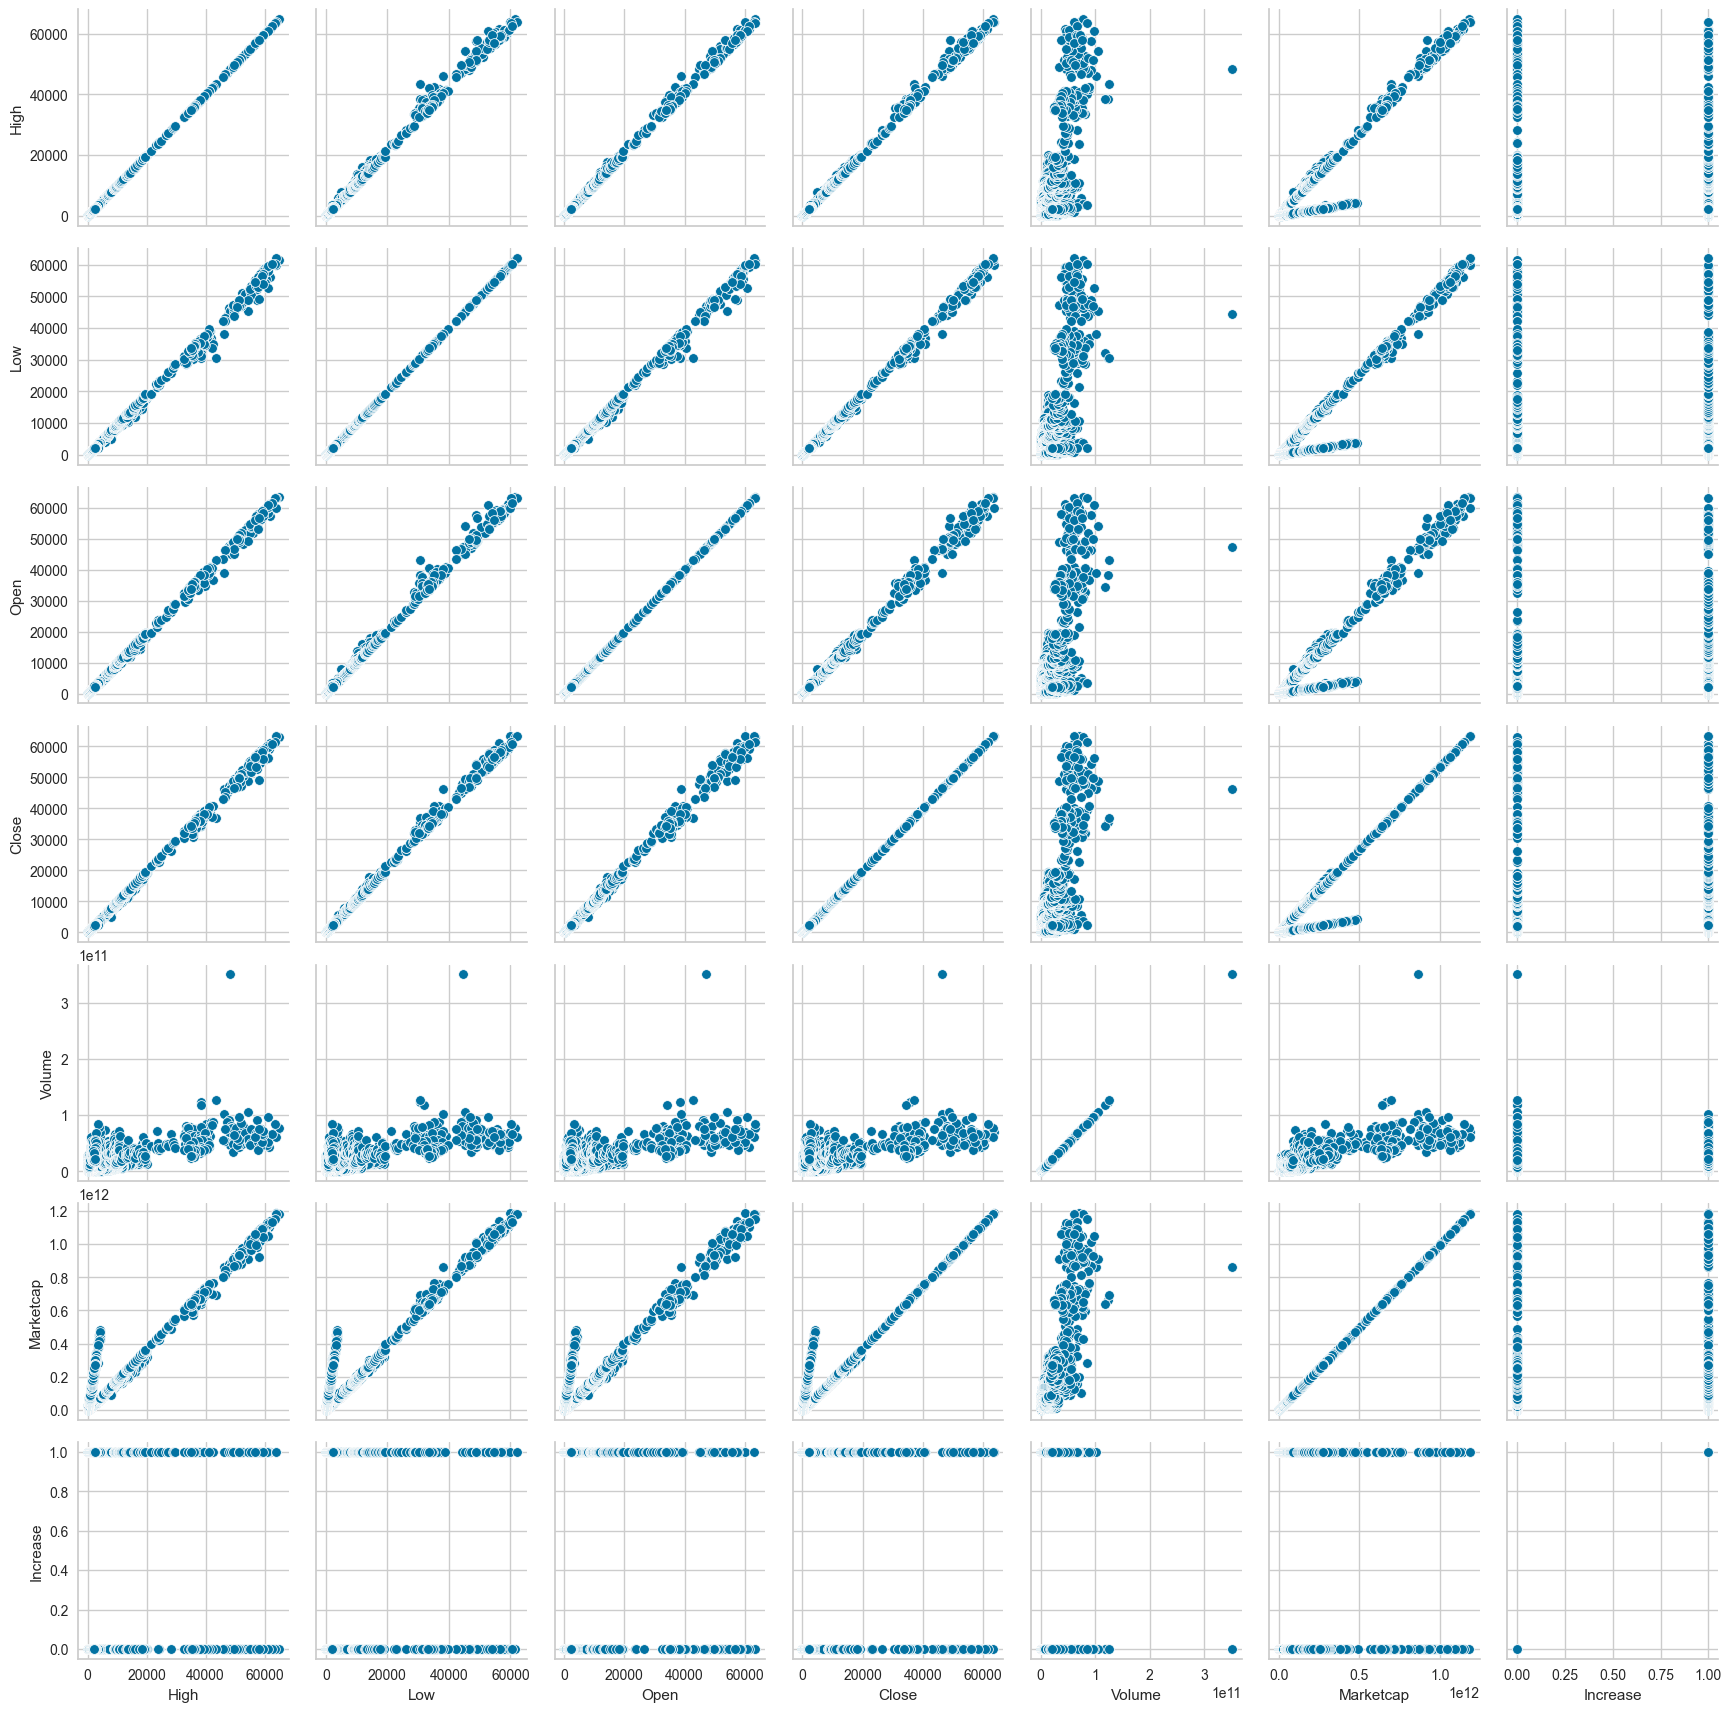

In [157]:
train_data 
train_data = train_data.drop(labels=["Change"], axis=1)
train_data


import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)


In [158]:
train_data["Date"] = df["Date"]
train_data

,High,Low,Open,Close,Volume,Marketcap,Increase,Date
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1,2013-04-29 23:59:59
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,0,2013-04-30 23:59:59
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,0,2013-05-01 23:59:59
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,0,2013-05-02 23:59:59
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,0,2013-05-03 23:59:59
...,...,...,...,...,...,...,...,...
2155,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,1,2021-07-02 23:59:59
2156,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,1,2021-07-03 23:59:59
2157,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,1,2021-07-04 23:59:59
2158,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,0,2021-07-05 23:59:59


In [159]:
# lazy, it should be a datetime frs it was a string just filter out those 2021
test_data = train_data[train_data["Date"].dt.year >= 2021]
X = train_data[train_data["Date"].dt.year < 2021]

X = X.sort_values(by="Date")
test_data = test_data.sort_values(by="Date")

print(X)
print(test_data)

              High           Low          Open         Close        Volume  \
0       147.488007    134.000000    134.444000    144.539993  0.000000e+00   
1       146.929993    134.050003    144.000000    139.000000  0.000000e+00   
2       139.889999    107.720001    139.000000    116.989998  0.000000e+00   
3       125.599998     92.281898    116.379997    105.209999  0.000000e+00   
4       108.127998     79.099998    106.250000     97.750000  0.000000e+00   
...            ...           ...           ...           ...           ...   
1970    737.952903    692.149438    730.358684    731.520119  1.871068e+10   
2802  28937.740004  27360.089709  27360.089709  28840.953420  5.128744e+10   
1971    754.303234    720.988875    731.472845    751.618972  1.729457e+10   
2803  29244.876688  28201.991994  28841.573758  29001.719822  4.675496e+10   
1972    754.299440    726.511908    751.626643    737.803398  1.392685e+10   

         Marketcap  Increase                Date  
0     1.6037

In [160]:
X_y = X["Marketcap"]

X = X.drop(labels=["Increase","Date", "Marketcap",], axis=1)

test_y = test_data["Marketcap"]
test_data = test_data.drop(labels=["Increase", "Date", "Marketcap",], axis=1)

X_y

0       1.603769e+09
1       1.542813e+09
2       1.298955e+09
3       1.168517e+09
4       1.085995e+09
            ...     
1970    8.342033e+10
2802    5.360338e+11
1971    8.572258e+10
2803    5.390511e+11
1972    8.415681e+10
Name: Marketcap, Length: 4777, dtype: float64

In [161]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

LR.fit(X, X_y)

LinearRegression()

In [162]:
LR.score(test_data, test_y)

0.8105517354407638

In [163]:
from sklearn.metrics import mean_absolute_error
ypred = LR.predict(test_data)
mean_absolute_error(test_y, ypred)

130734959536.50595

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


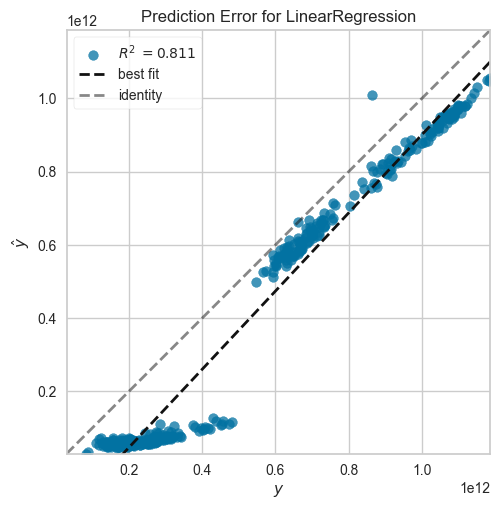

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [164]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(LR)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


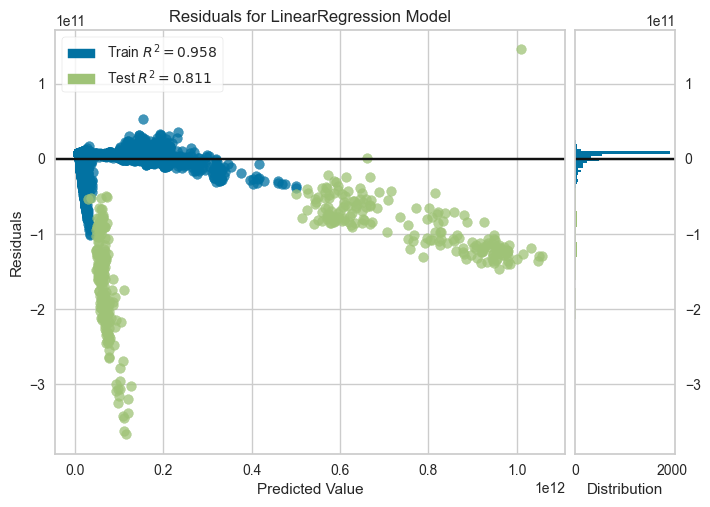

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [165]:
visualizer = ResidualsPlot(LR)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [66]:
# from sklearn.metrics import ConfusionMatrixDisplay

# def confusion_mtx(model, Y, predict):
#     disp = ConfusionMatrixDisplay.from_predictions(
#         Y,
#         predict,
#     )
#     plt.show()
# # does not work, I believe due to the labels not really discrete. Works on classifier mostly with 2 labels only unlike marketcap prediction
# confusion_mtx(LR, test_y, LR.predict(test_data))

In [166]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(X, X_y)
ypred=Ls.predict(test_data)
Ls.score(test_data, test_y)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.153e+23, tolerance: 2.424e+21
  model = cd_fast.enet_coordinate_descent(


0.8104996840973119

In [167]:
from sklearn.metrics import mean_absolute_error
ypred = Ls.predict(test_data)
mean_absolute_error(test_y, ypred)

130839662660.52821

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


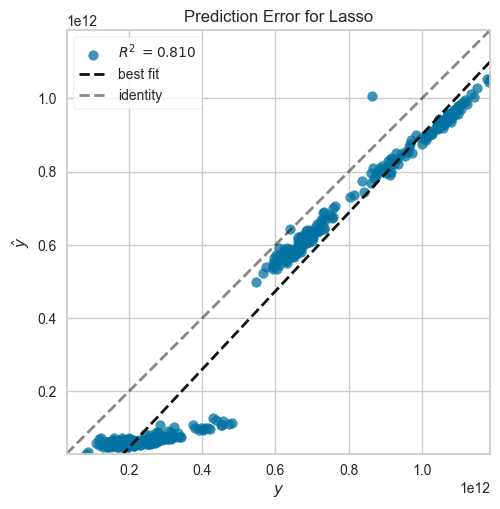

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [168]:
visualizer = PredictionError(Ls)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


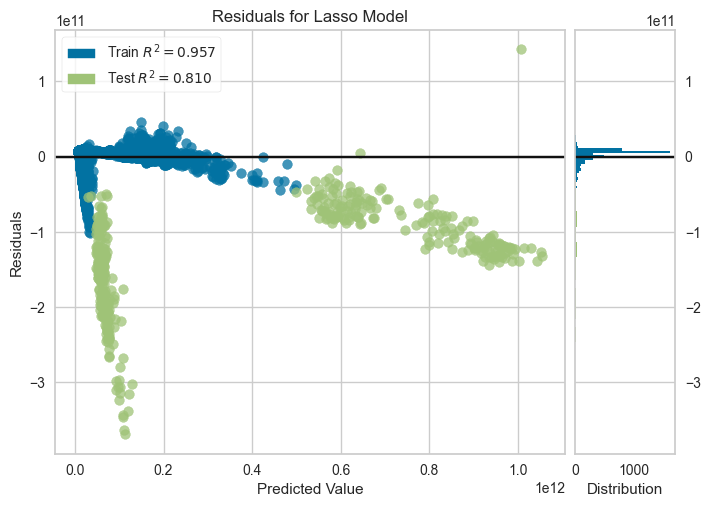

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [169]:
visualizer = ResidualsPlot(Ls)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [170]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor()
mytre.fit(X, X_y)
ypred=mytre.predict(test_data)
mytre.score(test_data, test_y)

0.23863701563154704

In [171]:
from sklearn.metrics import mean_absolute_error
ypred = mytre.predict(test_data)
mean_absolute_error(test_y, ypred)

242579763606.80432

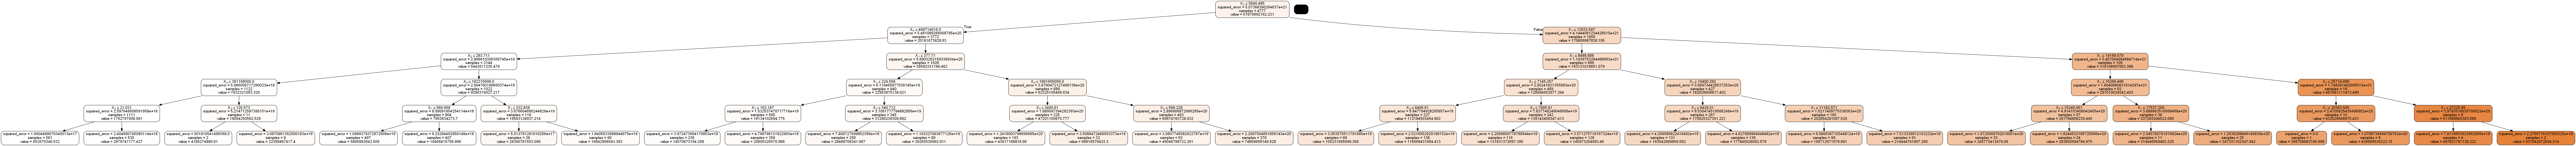

In [172]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4
# https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

dot_data = StringIO()

model=DecisionTreeRegressor(max_depth=5) # to fit in image, do not change max_depth for better accuracy
model.fit(X, X_y)
# model.score(test_data, test_y)
# estimator = model.estimators_[5]
export_graphviz(model, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("tree.png")

Image(graph.create_png())

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


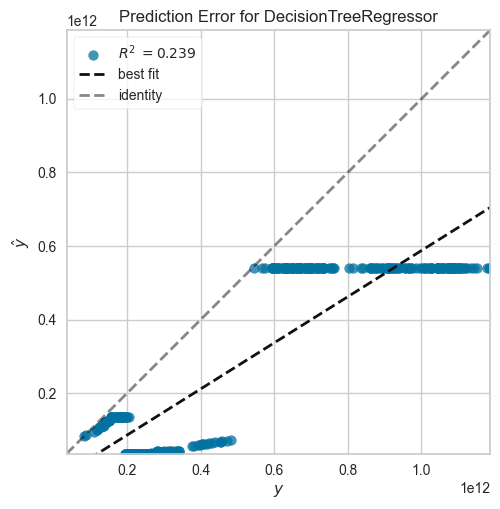

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [173]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(mytre)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


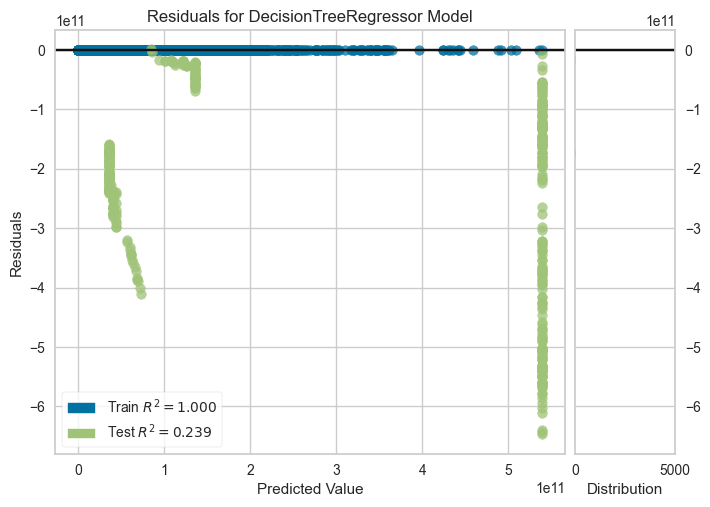

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [174]:
visualizer = ResidualsPlot(mytre)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [175]:
from sklearn.ensemble import RandomForestRegressor

randfor = RandomForestRegressor()
randfor.fit(X, X_y)
ypred = randfor.predict(test_data)
randfor.score(test_data, test_y)

0.23449179501362927

In [176]:
from sklearn.metrics import mean_absolute_error
ypred = randfor.predict(test_data)
mean_absolute_error(test_y, ypred)

241254791057.1518

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4
# https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

dot_data = StringIO()

model = RandomForestRegressor(max_depth=5) # to fit in image, do not change max_depth for better accuracy
model.fit(X, X_y)
estimator = model.estimators_[5]
export_graphviz(estimator, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("tree.png")

Image(graph.create_png())

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


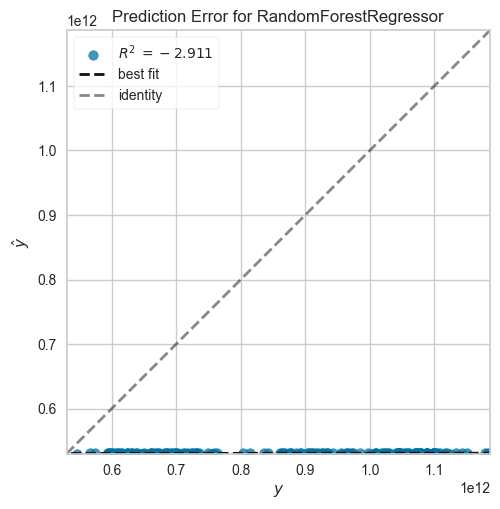

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [132]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(randfor)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


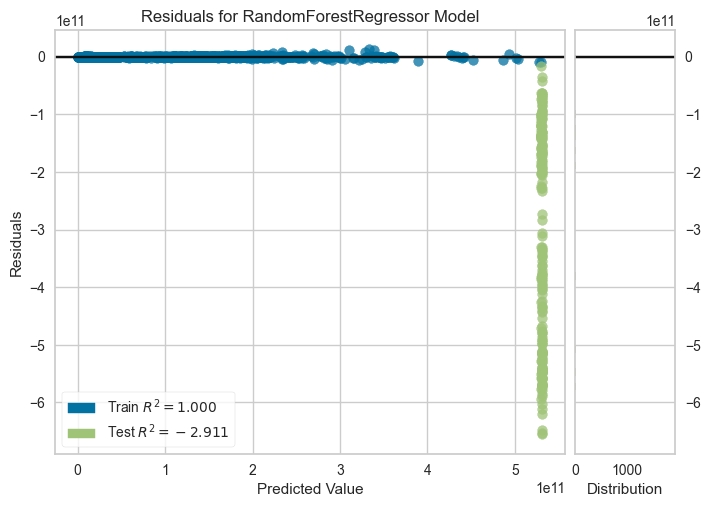

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [133]:
visualizer = ResidualsPlot(randfor)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [134]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X, X_y)
ypred = svr.predict(test_data)
svr.score(test_data, test_y)

-19.779511942542452

In [135]:
from sklearn.metrics import mean_absolute_error
ypred = svr.predict(test_data)
mean_absolute_error(test_y, ypred)

833184244607.244

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


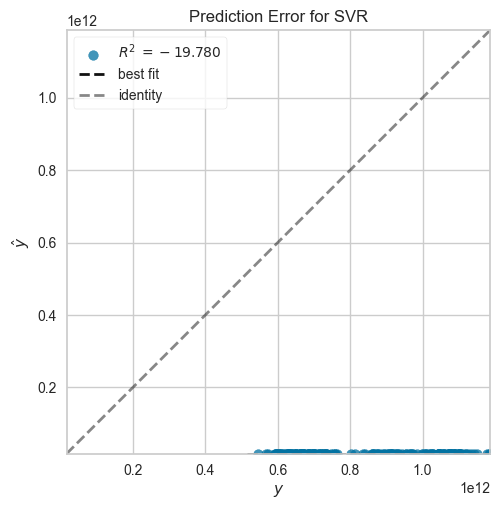

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [136]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(svr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


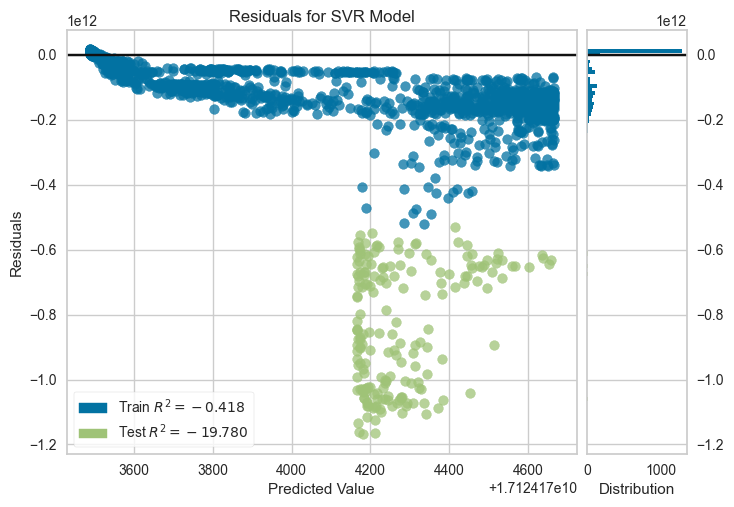

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [137]:
visualizer = ResidualsPlot(svr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

test_scale = scale.transform(test_data)

st_vr = SVR()
st_vr.fit(X_scale, X_y)
st_vr.score(test_scale, test_y)

-19.779511933543844

In [139]:
from sklearn.metrics import mean_absolute_error
ypred = st_vr.predict(test_scale)
mean_absolute_error(test_y, ypred)

833184244426.4313

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


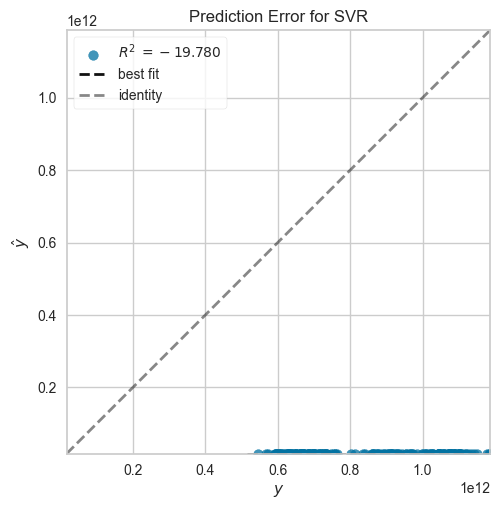

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [140]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(st_vr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


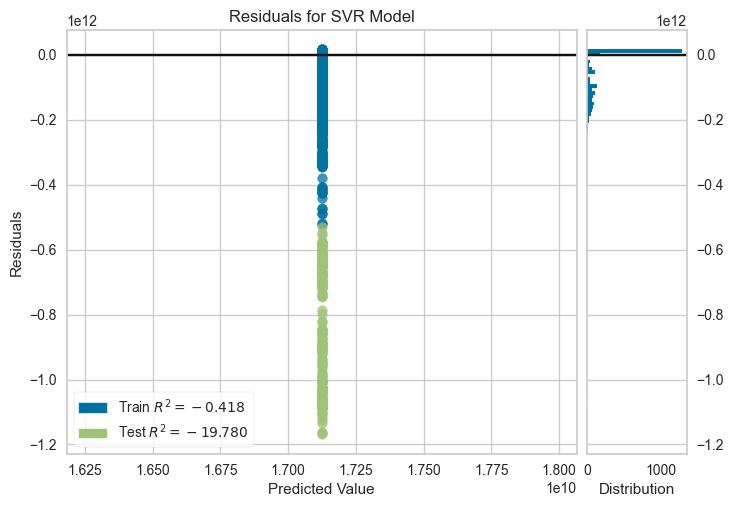

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [141]:
visualizer = ResidualsPlot(st_vr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [142]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()
lsvr.fit(X, X_y)
ypred = lsvr.predict(test_data)
lsvr.score(test_data, test_y)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-4588.946561036864

In [143]:
from sklearn.metrics import mean_absolute_error
ypred = lsvr.predict(test_data)
mean_absolute_error(test_y, ypred)

11379157463957.719

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


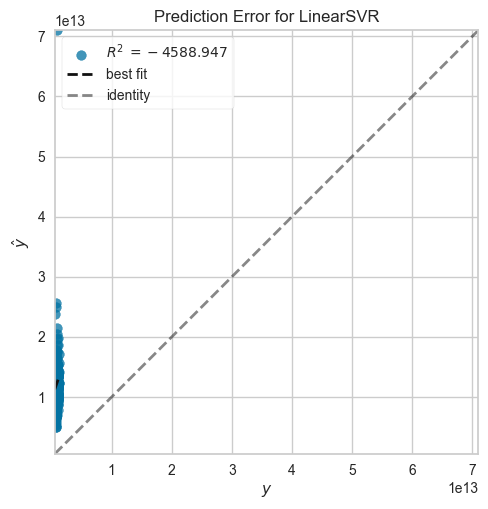

<AxesSubplot:title={'center':'Prediction Error for LinearSVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [144]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lsvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


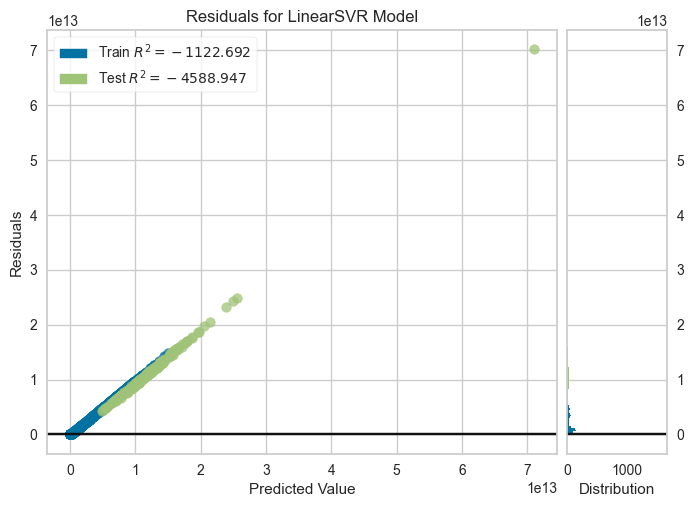

<AxesSubplot:title={'center':'Residuals for LinearSVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [145]:
visualizer = ResidualsPlot(lsvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [146]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

test_scale = scale.transform(test_data)

st_lvr = LinearSVR()
st_lvr.fit(X_scale, X_y)
st_lvr.score(test_scale, test_y)

-20.600911129403052

In [147]:
from sklearn.metrics import mean_absolute_error
ypred = st_lvr.predict(test_data)
mean_absolute_error(test_y, ypred)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


850308416081.5227

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


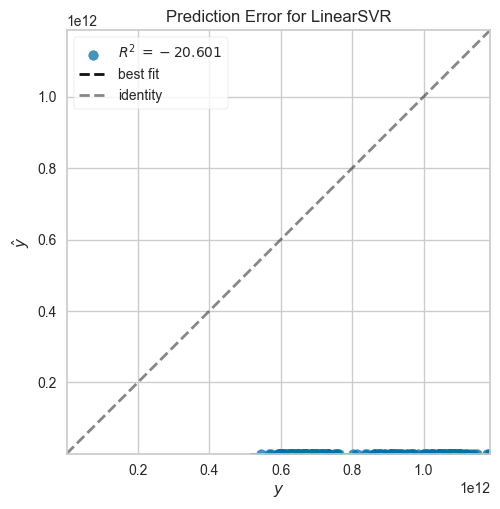

<AxesSubplot:title={'center':'Prediction Error for LinearSVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [148]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(st_lvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


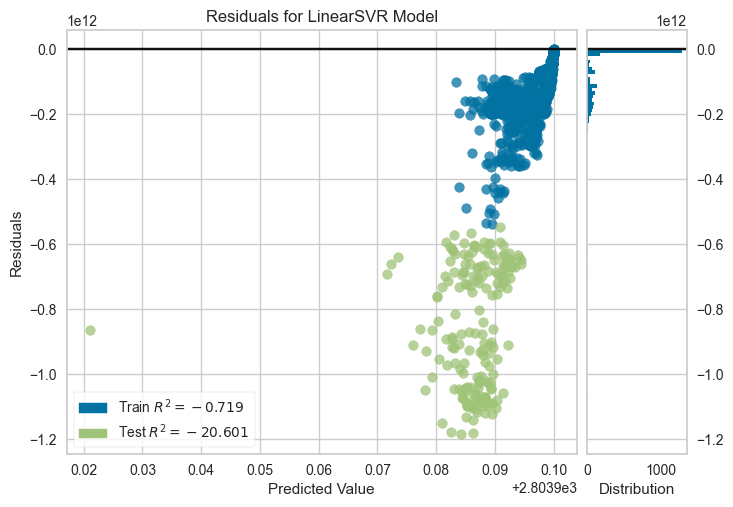

<AxesSubplot:title={'center':'Residuals for LinearSVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [149]:
visualizer = ResidualsPlot(st_lvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()